# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Irvan Raditya Ardiansyah
- **Email:** irvan14ardiansyah@gmail.com
- **ID Dicoding:** irvanardiansyah

In [16]:
pip install streamlit

## Menentukan Pertanyaan Bisnis

- Where is Top 5 State with the most order?
- What is the most used payment method?


## Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [18]:
customers_df = pd.read_csv("customers_dataset.csv")
geolocation_df=pd.read_csv("geolocation_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_df = pd.read_csv("orders_dataset.csv")
product_category_df =  pd.read_csv("product_category_name_translation.csv")
product_df = pd.read_csv("products_dataset.csv")
seller_df = pd.read_csv("sellers_dataset.csv")

<ipython-input-18-e4ea99673195>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  geolocation_df=pd.read_csv("geolocation_dataset.csv")


Collecting data source

### Assessing Data

In [19]:
product_df.isnull().sum()
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630335 entries, 0 to 630334
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  630335 non-null  int64  
 1   geolocation_lat              630335 non-null  object 
 2   geolocation_lng              630334 non-null  float64
 3   geolocation_city             630334 non-null  object 
 4   geolocation_state            630334 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.0+ MB


In [20]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
order_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
customers_df.info()
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_state
RR       46
AP       68
AC       81
AM      148
RO      253
TO      280
SE      350
AL      413
RN      485
PI      495
PB      536
MS      715
MA      747
MT      907
PA      975
CE     1336
PE     1652
GO     2020
ES     2033
DF     2140
BA     3380
SC     3637
PR     5045
RS     5466
MG    11635
RJ    12852
SP    41746
Name: customer_id, dtype: int64

In [23]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [24]:
order_payments_df.info()
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique"
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id
payment_type,
boleto,19784
credit_card,76505
debit_card,1528
not_defined,3
voucher,3866


### Cleaning Data

In [25]:
product_df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore State & payment method

In [26]:
order_df.groupby(by="order_status").agg({
    "order_id": "nunique"
})

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [27]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique"
})

,order_id
payment_type,
boleto,19784
credit_card,76505
debit_card,1528
not_defined,3
voucher,3866


In [28]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

customer_state
RR       46
AP       68
AC       81
AM      148
RO      253
TO      280
SE      350
AL      413
RN      485
PI      495
PB      536
MS      715
MA      747
MT      907
PA      975
CE     1336
PE     1652
GO     2020
ES     2033
DF     2140
BA     3380
SC     3637
PR     5045
RS     5466
MG    11635
RJ    12852
SP    41746
Name: customer_id, dtype: int64

In [29]:
d1=pd.merge(
    left=order_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_sequential             103886 non-null  float64
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  float64
 11  payment_value                  103886 non-null  float64
dtypes: float64(3), object(9)
memor

In [30]:
d2=pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
d2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [31]:
top5state=customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(5)

<ipython-input-32-9321357cbd19>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-32-9321357cbd19>:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


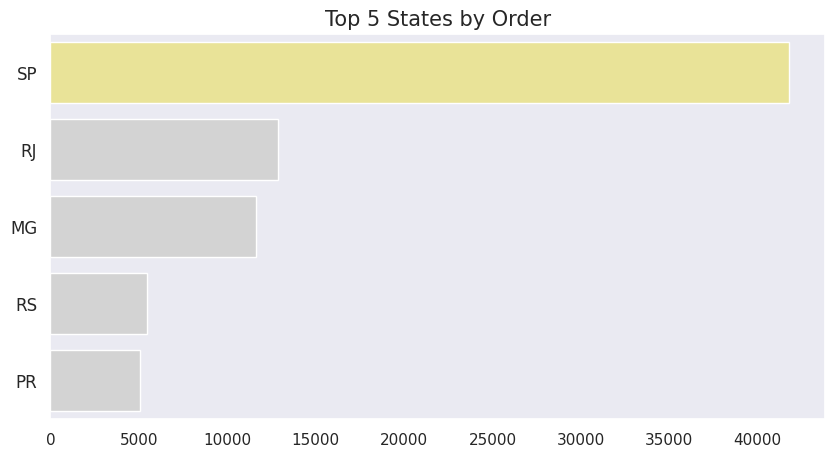

In [32]:
bystate_df = d2.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#F7EF8A", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Top 5 States by Order", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [33]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Pertanyaan 2:

In [34]:
min_date = d1["order_purchase_timestamp"].min()
max_date = d1["order_purchase_timestamp"].max()

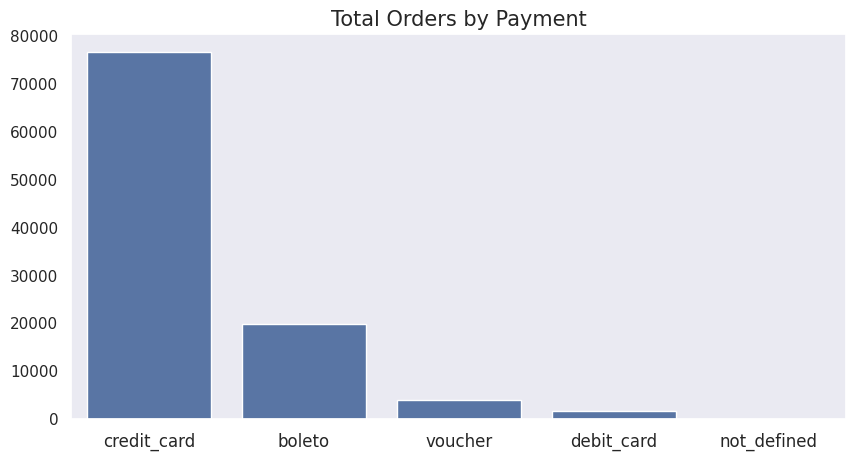

In [38]:
bypayment_df = d1.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#F7EF8A", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_count",
    x="payment_type",
    data=bypayment_df.sort_values(by="customer_count", ascending=False)
)
plt.title("Total Orders by Payment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [36]:
d1.to_csv("d1.csv", index=False)

In [37]:
d2.to_csv("d22.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Jadi 5 State dengan pembelian terbanyak diisi oleh SP,RJ, MG, RS, PR



- Conclution pertanyaan 2 : Metode pembayaran terbanyak dipimping oleh Credit card